In [2]:
################################

### Load packages

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.stats



In [3]:

### Analyse data

# Create empty dictionary for data-frames containing analysis for trimers
d = {}
for name in ['homotrimer', 'heterotrimer', 'apo-homotrimer', 'apo-heterotrimer']:

    # Specify path to directory
    path = "/mnt/d/Dropbox/Emily Johnson BBSRC NLD DTP supervisors/computational_work/3d_modelling_and_md/type_i_col_propeptide/equilibrium_simulation_results/{}/rmsd/".format(name)

    # Create the list of file names: filenames
    filenames = os.listdir(path)

    # Append data from each replicate to list 
    data = []
    for file in filenames:
        if file.endswith('.xvg'):
            x,y = np.loadtxt(path+"{}".format(file),comments=['#','@'],unpack=True)
            y = y[:40001]
            x = x[:40001]
            data.append(y)
    
    # Create dataframe from list
    d[name] = pd.DataFrame(np.transpose(data), index=x)
    d[name].index.names = ["Time (ps)"]

    # Analysis 
    d[name]['Mean'] = d[name].iloc[:, 0:len(data)].mean(axis=1)
    d[name]['Standard Deviation'] = d[name].iloc[:, 0:len(data)].std(axis=1)
    d[name]['Standard Error'] = (d[name].iloc[:, 0:len(data)].sem(axis=1))/2
    d[name]['Min'] = d[name].iloc[:, 0:len(data)].min(axis=1)
    d[name]['Max'] = d[name].iloc[:, 0:len(data)].max(axis=1)
    d[name]['Std dev/2'] = d[name]['Standard Deviation']/2

    # Reset index so it can be used as a value for x
    d[name] = d[name].reset_index()


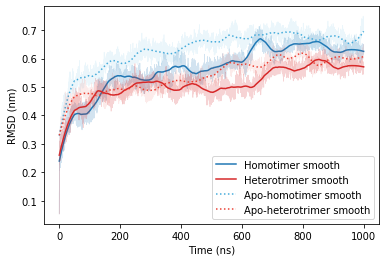

In [4]:
### Plot Data 
# https://matplotlib.org/3.3.0/users/dflt_style_changes.html

import matplotlib as mpl
from cycler import cycler

#plt.figure(figsize=(8, 5))
x = d['homotrimer']['Time (ps)']

y = d['homotrimer']['Mean']
plt.plot(x, y, linewidth=0.7, alpha=0.2, color='#1f77b4')
yhat = scipy.signal.savgol_filter(y, 4001, 2)
plt.plot(x, yhat, 'k-', label='Homotimer smooth', color='#1f77b4')


y = d['heterotrimer']['Mean']
plt.plot(x, y, linewidth=0.7, alpha=0.2, color='#d62728')
yhat = scipy.signal.savgol_filter(y, 4001, 2)
plt.plot(x, yhat, 'k-', label='Heterotrimer smooth', color='#d62728')


y = d['apo-homotrimer']['Mean']
plt.plot(x, y, linewidth=0.7, alpha=0.1, color='#44abdb')
yhat = scipy.signal.savgol_filter(y, 4001, 2)
plt.plot(x, yhat, 'k-', label='Apo-homotimer smooth', color='#44abdb', linestyle='dotted')


y = d['apo-heterotrimer']['Mean']
plt.plot(x, y, linewidth=0.7, alpha=0.1, color='#eb4034')
yhat = scipy.signal.savgol_filter(y, 4001, 2)
plt.plot(x, yhat, 'k-', label='Apo-heterotrimer smooth', color='#eb4034', linestyle='dotted')



# Formatting

plt.xlabel('Time (ns)')
plt.ylabel('RMSD (nm)')
plt.legend()
plt.legend(loc='lower right')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('rmsd.png', bbox_inches='tight',dpi=300)
plt.show()